# MIE1624 Project
## Webscraping Indeed

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#Open URL and read it
ind=[]
page=10
url = urlopen("https://ca.indeed.com/jobs?q=data+science")
content = url.read()
ind.append(BeautifulSoup(content, "lxml"))
while (page < 999):
    url= urlopen("https://ca.indeed.com/jobs?q=data+science&start="+str(page))
    content = url.read()
    ind.append(BeautifulSoup(content, "lxml"))
    page+=10
print(len(ind))

100


In [3]:
joblinks=[]

for p in range (1,len(ind)):
    for divTag in ind[p-1].find_all( "div", {"data-tn-component" : "organicJob"}):
        for Tag in divTag.find_all('h2'):
            for aTag in Tag.find_all('a'):
                joblinks.append(aTag.get('href'))

print(len(joblinks))

990


In [4]:
indjobs={}
key=0
for link in joblinks:
     #Open link
    print ('Opening %d jobs out of %d jobs'%(key,len(joblinks)))
    if link[:3]=="/rc":
        url = urlopen("https://ca.indeed.com/viewjob?"+link[8:])
    else:
        url = urlopen("https://ca.indeed.com/cmp"+link[8:])
    content = url.read()
    html = BeautifulSoup(content, "lxml")
    indjobs[key]={}
    job_title=html.find_all(class_ = 'jobtitle')
        
    job_headers = html.find_all('div', attrs={'data-tn-component': 'jobHeader'})
    job_results = html.find_all('div', class_='result-link-bar')
    
    
    if len(job_title) > 0:
        indjobs[key]['Job Title']=job_title[0]
    else:
        continue
        
    if len(job_headers) > 0:
        indjobs[key]['Company'] = job_headers[0].find('span', class_="company")
    else:
        indjobs[key]['Company'] = ""
        
    if len(job_results) > 0:
        indjobs[key]['Date Posted'] = job_results[0].find(class_="date")
    else:
        indjobs[key]['Date Posted'] = ""
    
    indjobs[key]['Location'] = html.find(id="where")['value']
    indjobs[key]['Job Summary']=html.find(id="job_summary")
    key+=1
    
print(len(indjobs))

Opening 0 jobs out of 990 jobs
Opening 1 jobs out of 990 jobs
Opening 2 jobs out of 990 jobs
Opening 3 jobs out of 990 jobs
Opening 4 jobs out of 990 jobs
Opening 5 jobs out of 990 jobs
Opening 6 jobs out of 990 jobs
Opening 7 jobs out of 990 jobs
Opening 8 jobs out of 990 jobs
Opening 9 jobs out of 990 jobs
Opening 10 jobs out of 990 jobs
Opening 11 jobs out of 990 jobs
Opening 12 jobs out of 990 jobs
Opening 13 jobs out of 990 jobs
Opening 14 jobs out of 990 jobs
Opening 15 jobs out of 990 jobs
Opening 16 jobs out of 990 jobs
Opening 17 jobs out of 990 jobs
Opening 18 jobs out of 990 jobs
Opening 19 jobs out of 990 jobs
Opening 20 jobs out of 990 jobs
Opening 21 jobs out of 990 jobs
Opening 22 jobs out of 990 jobs
Opening 23 jobs out of 990 jobs
Opening 24 jobs out of 990 jobs
Opening 25 jobs out of 990 jobs
Opening 26 jobs out of 990 jobs
Opening 27 jobs out of 990 jobs
Opening 28 jobs out of 990 jobs
Opening 29 jobs out of 990 jobs
Opening 30 jobs out of 990 jobs
Opening 31 jobs ou

In [101]:
print (indjobs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [5]:
#Write CSV file
import csv
with open("jobs.csv", "w", encoding="utf-8") as toWrite:
    writer = csv.writer(toWrite, delimiter=",")
    writer.writerow([ "Title","Location", "Company", "Date Posted","Summary"])
    rank = indjobs.keys()
    rank = list(map(int, rank))
    rank.sort()
    for x in rank:
        writer.writerow([indjobs[x]['Job Title'], indjobs[x]['Location'], indjobs[x]['Company'], indjobs[x]['Date Posted'], indjobs[x]['Job Summary']])

In [6]:
#Import CSV file to open
import pandas
indeed_jobs = pandas.read_csv('jobs.csv')
indeed_jobs

,Title,Location,Company,Date Posted,Summary
0,"<b class=""jobtitle""><font size=""+1"">Data Scien...","Calgary, AB","<span class=""company"">City of Calgary</span>","<span class=""date"">4 days ago</span>","<span class=""summary"" id=""job_summary""><div><d..."
1,"<b class=""jobtitle""><font size=""+1"">Data Analy...","St. Albert, AB","<span class=""company"">Alberta Gaming and Liquo...","<span class=""date"">8 days ago</span>","<span class=""summary"" id=""job_summary""><p><b>J..."
2,"<b class=""jobtitle""><font size=""+1"">Data Scien...","Toronto, ON","<span class=""company"">IBM</span>","<span class=""date"">13 days ago</span>","<span class=""summary"" id=""job_summary"">Job Des..."
3,"<b class=""jobtitle""><font size=""+1"">Jr Data Sc...","Ottawa, ON","<span class=""company"">Trend Micro</span>","<span class=""date"">12 days ago</span>","<span class=""summary"" id=""job_summary""><div><d..."
4,"<b class=""jobtitle""><font size=""+1"">Data Scien...","Fredericton, NB","<span class=""company"">Avrij Inc</span>","<span class=""date"">21 days ago</span>","<span class=""summary"" id=""job_summary""><p><b>P..."
5,"<b class=""jobtitle""><font size=""+1"">Data Scien...","Mississauga, ON","<span class=""company"">Quartic.ai</span>","<span class=""date"">30+ days ago</span>","<span class=""summary"" id=""job_summary""><p><b>J..."
6,"<b class=""jobtitle""><font size=""+1"">Data Scien...","Ottawa, ON","<span class=""company"">City of Ottawa</span>","<span class=""date"">7 days ago</span>","<span class=""summary"" id=""job_summary"">Positio..."
7,"<b class=""jobtitle""><font size=""+1"">FORENSIC R...","Orillia, ON","<span class=""company"">Ministry of Community Sa...","<span class=""date"">19 days ago</span>","<span class=""summary"" id=""job_summary""><div><d..."
8,"<b class=""jobtitle""><font size=""+1"">Data Scien...","Vancouver, BC","<span class=""company"">BOEING</span>","<span class=""date"">30+ days ago</span>","<span class=""summary"" id=""job_summary""><div><p..."
9,"<b class=""jobtitle""><font size=""+1"">Forestry D...","Toronto, ON","<span class=""company"">City of Toronto</span>","<span class=""date"">30+ days ago</span>","<span class=""summary"" id=""job_summary"">Toronto..."


In [7]:
import re as regex
#remove regex in jobs
def remove_by_regex(jobs, expression):
    jobs.loc[:, 'Summary'].replace(expression, "", inplace=True)
    return jobs


#remove html tags and attributes
def remove_html_tags(jobs):
    for col in list(jobs.columns.values):
        jobs.loc[:, col].replace(regex.compile(r"<[^>]+>"), "", inplace=True)
    return jobs

#remove urls in tweets
def remove_urls(jobs):
    return remove_by_regex(jobs, regex.compile(r"(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*?($|\s))"))

#remove punctuations and special characters for better training data
def remove_special_characters(jobs):  
    for remove in map(lambda r: regex.compile(regex.escape(r)), [",", ":", "\"", "=", ";", "%", "$", "&",".",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",'’',
                                                                     "--", "---", "#","…", "\n", "\r"]):
        jobs.loc[:, 'Summary'].replace(remove, " ", inplace=True)
    return jobs

#convert tweets to lowercase
def to_lower_case(jobs):
    jobs.loc[:, 'Summary'] = jobs.loc[:, 'Summary'].apply(lambda x: x.lower())
    return jobs

indeed_jobs = to_lower_case(remove_special_characters(remove_urls(remove_html_tags(indeed_jobs))))
indeed_jobs

,Title,Location,Company,Date Posted,Summary
0,Data Scientist,"Calgary, AB",City of Calgary,4 days ago,you are a city of calgary employee who is comm...
1,"Data Analyst (temporary for one year, with the...","St. Albert, AB",Alberta Gaming and Liquor Commission,8 days ago,job summaryaglc is looking for a dynamic profe...
2,"Data Scientist - Coop (Toronto, ON)","Toronto, ON",IBM,13 days ago,job description change the world at ibm there...
3,Jr Data Scientist,"Ottawa, ON",Trend Micro,12 days ago,discover trend since 1988 trend micro has b...
4,Data Scientist - Artificial Intelligence / Mac...,"Fredericton, NB",Avrij Inc,21 days ago,position overview description avrij analytics...
5,Data Science Engineer Intern,"Mississauga, ON",Quartic.ai,30+ days ago,job summaryquartic ai is combining artificial ...
6,Data Scientist,"Ottawa, ON",City of Ottawa,7 days ago,position data scientist competition number ...
7,FORENSIC RESEARCH ANALYST - TEMPORARY POSITION...,"Orillia, ON",Ministry of Community Safety and Correctional ...,19 days ago,what can i expect to do in this role the mini...
8,Data Scientist,"Vancouver, BC",BOEING,30+ days ago,boeing vancouver houses an eclectic group of p...
9,Forestry Data Collector,"Toronto, ON",City of Toronto,30+ days ago,toronto is canada s largest city the fourth l...


In [8]:
def tokenize(jobs, tokenizer = nltk.word_tokenize):
    def tokenize_row(row):
        row["Tokenized Summary"] = tokenizer(row["Summary"])
        return row

    jobs = jobs.apply(tokenize_row, axis=1)
    return jobs

indeed_jobs = tokenize(indeed_jobs, nltk.word_tokenize)

from nltk.corpus import stopwords
#may not be useful, remove all duplicate words in tokenized summaries
for idx in indeed_jobs.index:
    tokenized_summary = set(indeed_jobs.loc[idx, "Tokenized Summary"])
    tokenized_summary = list(set(tokenized_summary))
    seen = set()
    result = []
    for item in tokenized_summary:
        if item not in seen:
            seen.add(item)
            result.append(item)
    indeed_jobs.loc[idx, "Tokenized Summary"] = result
    indeed_jobs.loc[idx, "Tokenized Summary2"] = indeed_jobs.loc[idx, "Title"]+' '+indeed_jobs.loc[idx, "Summary"]
    indeed_jobs.loc[idx, "Tokenized Summary2"] = nltk.word_tokenize(indeed_jobs.loc[idx, "Tokenized Summary2"])
    for word in indeed_jobs.loc[idx, "Tokenized Summary2"]: # iterate over word_list
        if word in stopwords.words('english'): 
            indeed_jobs.loc[idx, "Tokenized Summary2"].remove(word)

indeed_jobs

,Title,Location,Company,Date Posted,Summary,Tokenized Summary,Tokenized Summary2
0,Data Scientist,"Calgary, AB",City of Calgary,4 days ago,you are a city of calgary employee who is comm...,"[permanent, ingestion, education, including, c...","[Data, Scientist, are, city, calgary, employee..."
1,"Data Analyst (temporary for one year, with the...","St. Albert, AB",Alberta Gaming and Liquor Commission,8 days ago,job summaryaglc is looking for a dynamic profe...,"[permanent, microsoft, advise, multiple, areas...","[Data, Analyst, (, temporary, one, year, ,, po..."
2,"Data Scientist - Coop (Toronto, ON)","Toronto, ON",IBM,13 days ago,job description change the world at ibm there...,"[everyday, preferred, any, multiple, including...","[Data, Scientist, -, Coop, (, Toronto, ,, ON, ..."
3,Jr Data Scientist,"Ottawa, ON",Trend Micro,12 days ago,discover trend since 1988 trend micro has b...,"[lounge, take, google, very, atmosphere, prefe...","[Jr, Data, Scientist, discover, trend, since, ..."
4,Data Scientist - Artificial Intelligence / Mac...,"Fredericton, NB",Avrij Inc,21 days ago,position overview description avrij analytics...,"[high, take, workforce, tensorflow, situated, ...","[Data, Scientist, -, Artificial, Intelligence,..."
5,Data Science Engineer Intern,"Mississauga, ON",Quartic.ai,30+ days ago,job summaryquartic ai is combining artificial ...,"[was, key, year, experience, javaexperience, o...","[Data, Science, Engineer, Intern, job, summary..."
6,Data Scientist,"Ottawa, ON",City of Ottawa,7 days ago,position data scientist competition number ...,"[disciplinary, workforce, key, manipulate, lan...","[Data, Scientist, position, data, scientist, c..."
7,FORENSIC RESEARCH ANALYST - TEMPORARY POSITION...,"Orillia, ON",Ministry of Community Safety and Correctional ...,19 days ago,what can i expect to do in this role the mini...,"[organizational, address, police, microsoft, r...","[FORENSIC, RESEARCH, ANALYST, -, TEMPORARY, PO..."
8,Data Scientist,"Vancouver, BC",BOEING,30+ days ago,boeing vancouver houses an eclectic group of p...,"[understood, evolving, specialty, deliver, web...","[Data, Scientist, boeing, vancouver, houses, e..."
9,Forestry Data Collector,"Toronto, ON",City of Toronto,30+ days ago,toronto is canada s largest city the fourth l...,"[asian, take, kept, address, workforce, physio...","[Forestry, Data, Collector, toronto, canada, l..."


In [10]:
data_science_words_file = open("data_science_words.txt", "r")
data_science_words = data_science_words_file.read().split('\n')
data_science_words_file.close()
data_science_words
lower_case_data_science_words = [x.lower() for x in data_science_words]

In [107]:
#To Count all words
# words = Counter()
# stopwords=nltk.corpus.stopwords.words("english")
# for idx in indeed_jobs.index:
#     words.update(indeed_jobs.loc[idx, "Tokenized Summary"])


# for idx, stop_word in enumerate(stopwords):
#     del words[stop_word]
    
# for idx, stop_word1 in enumerate(words_to_remove):
#     del words[stop_word1]   

In [12]:
keyword_counter = Counter()
for idx in indeed_jobs.index:
    for keyword in lower_case_data_science_words:
        if keyword == 'r':
            if keyword in indeed_jobs.loc[idx, "Summary"].split():
                keyword_counter[keyword] += 1
        elif indeed_jobs.loc[idx, "Summary"].find(keyword) > -1:
            keyword_counter[keyword] += 1

for i,j in keyword_counter.most_common():
    print(j,i)

615 excel
404 sql
291 training
286 python
281 statistics
245 testing
234 machine learning
222 r
219 java
192 sas
190 mathematics
189 data analysis
160 big data
159 scala
158 cloud
149 visualization
143 algorithms
130 tableau
118 hadoop
117 spark
78 javascript
77 c++
76 hive
54 nosql
46 spss
34 matlab
32 ecl
30 php
28 perl
28 ruby
27 hbase
27 mapreduce
25 pig
21 cassandra
19 d3
18 mongodb
17 scripting languages
14 stata
9 decision tree
6 spotfire
6 oozie
4 modeling tools
3 calculus
3 zookeeper
2 mahout
2 linear algebra
1 risk modeling
1 shark
1 julia
1 octave


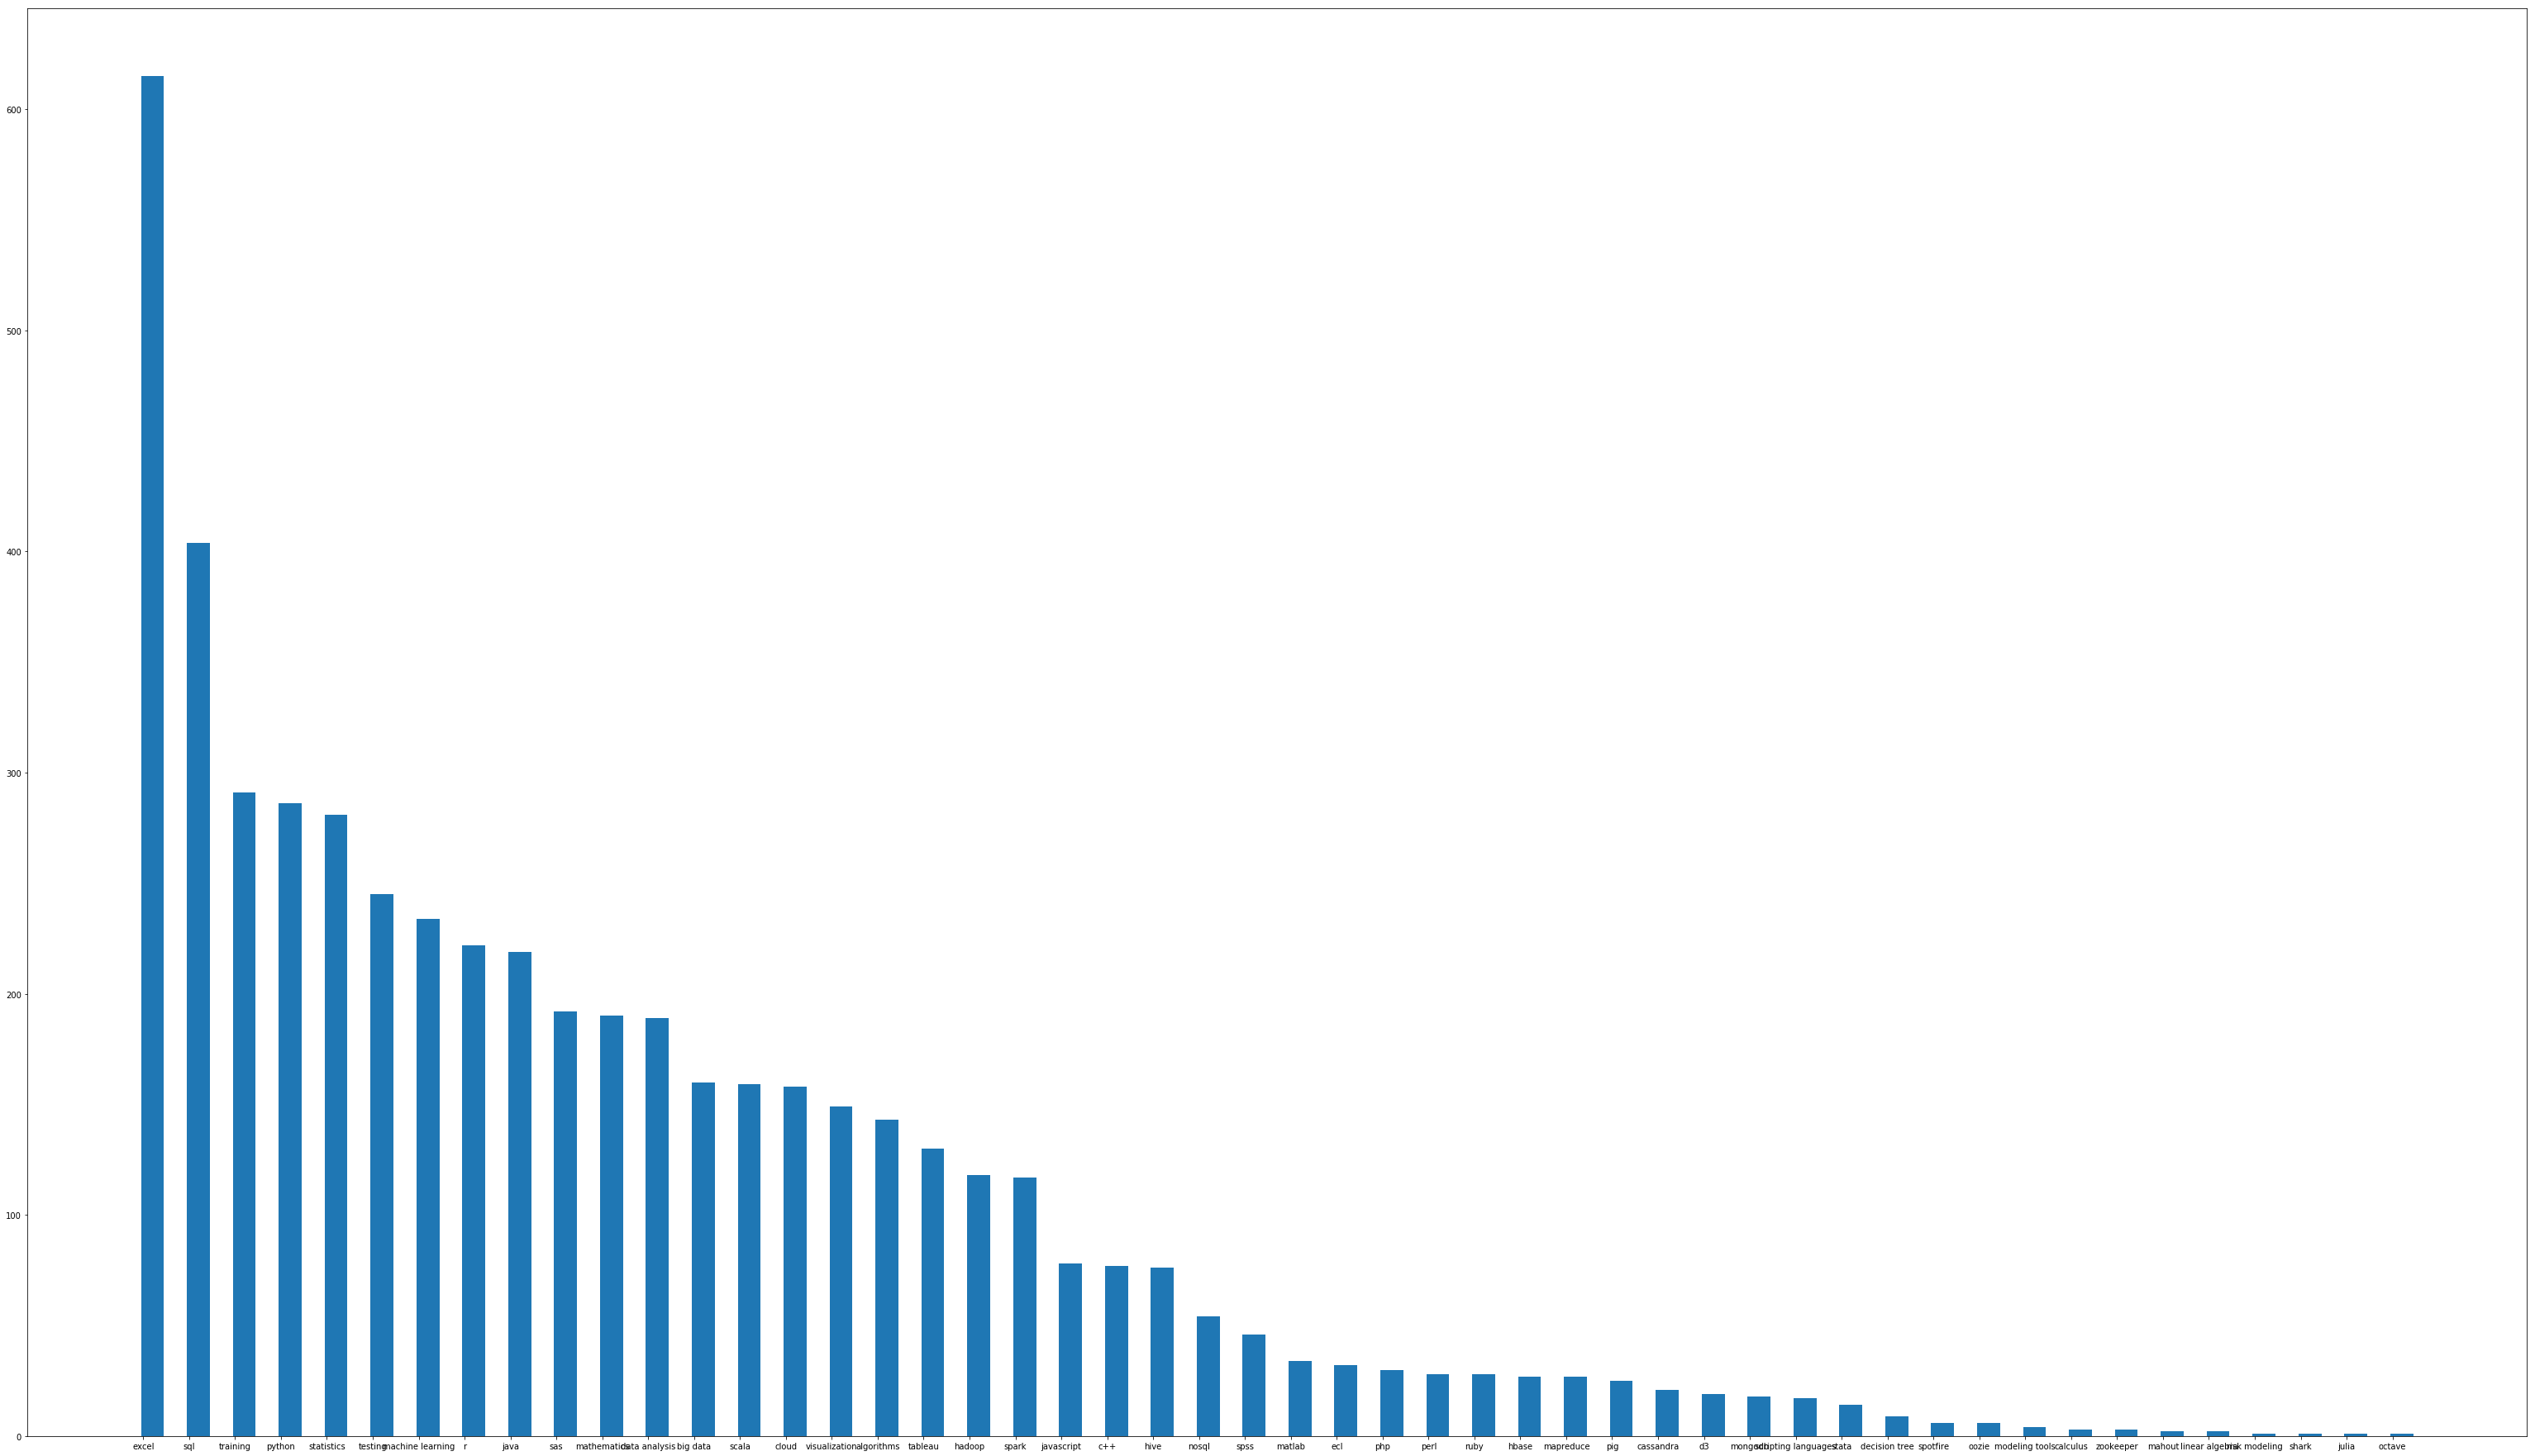

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
keywords, frequencies = zip(*keyword_counter.most_common())
plt.axes([1,2,7,6])
plt.rcParams.update({'font.size': 70})
word_plot = plt.bar(np.arange(len(keyword_counter)), frequencies, align='edge', width = 0.5)
plt.xticks(np.arange(len(keyword_counter))+ 0.05, keywords)
plt.savefig('plot.jpg')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.show()

In [14]:
indeed_jobs['Tokenized Summary2']

0      [Data, Scientist, are, city, calgary, employee...
1      [Data, Analyst, (, temporary, one, year, ,, po...
2      [Data, Scientist, -, Coop, (, Toronto, ,, ON, ...
3      [Jr, Data, Scientist, discover, trend, since, ...
4      [Data, Scientist, -, Artificial, Intelligence,...
5      [Data, Science, Engineer, Intern, job, summary...
6      [Data, Scientist, position, data, scientist, c...
7      [FORENSIC, RESEARCH, ANALYST, -, TEMPORARY, PO...
8      [Data, Scientist, boeing, vancouver, houses, e...
9      [Forestry, Data, Collector, toronto, canada, l...
10     [Data, Science, Machine, Learning, -, Internsh...
11     [Data, Scientist, data, scientistwho, arequant...
12     [Data, Scientist, job, summarywant, join, team...
13     [Data, Scientist, client, based, mississauga, ...
14     [Data, Scientist, finesse, tech, looking, a, d...
15     [Data, Scientist, fx, innovation, priority, hu...
16     [Data, Scientist, -, Machine, Learning, Specia...
17     [Machine, Learning, Rese

In [15]:

indeed_jobs['Tokenized Summary2'].to_csv('indeedlist.csv')
test = pandas.read_csv('indeedlist.csv', engine='python')
test

0  \
0      1   
1      2   
2      3   
3      4   
4      5   
5      6   
6      7   
7      8   
8      9   
9     10   
10    11   
11    12   
12    13   
13    14   
14    15   
15    16   
16    17   
17    18   
18    19   
19    20   
20    21   
21    22   
22    23   
23    24   
24    25   
25    26   
26    27   
27    28   
28    29   
29    30   
..   ...   
959  960   
960  961   
961  962   
962  963   
963  964   
964  965   
965  966   
966  967   
967  968   
968  969   
969  970   
970  971   
971  972   
972  973   
973  974   
974  975   
975  976   
976  977   
977  978   
978  979   
979  980   
980  981   
981  982   
982  983   
983  984   
984  985   
985  986   
986  987   
987  988   
988  989   

    ['Data', 'Scientist', 'are', 'city', 'calgary', 'employee', 'committed', 'public', 'service', 'enjoys', 'collaborating', 'others', 'shares', 'values', 'encourage', 'grow', 'career', 'within', 'organization', 'develop', 'skills', 'taking', 'new', 'challenges', 'together', 'make', 'calgary', 'great', 'place', 'make', 'living', 'great', 'place', 'make', 'life', 'data', 'scientist', 'focus', 'identifying', 'opportunities', 'demonstrate', 'ability', 'organization', 'make', 'data', 'driven', 'decisions', 'primary', 'focus', 'development', 'predictive', 'prescriptive', 'models', 'advanced', 'data', 'visualization', 'identify', 'forecast', 'trends', 'cause', 'effect', 'relationships', 'lead', 'recommendations', 'measurably', 'maximize', 'operational', 'efficiency', 'collaboration', 'data', 'scientists', 'advanced', 'analytics', 'group', 'aims', 'apply', 'cutting', 'edge', 'machine', 'learning', 'techniques', 'statistics', 'to', 'serve', 'city', 'growing', 'demands', 'intelligent', 'services', 'forecasting', 'models', 'information', 'dashboards', 'complex', 'content', 'analysis', 'work', 'involves', 'sustainable', 'investigation', 'empirical', 'evaluation', 'scientific', 'research', 'software', 'implementation', 'position', 'part', 'advanced', 'analytics', 'analyticscalgary', 'program', 'data', 'scientist', 'domain', 'expert', 'modern', 'computing', 'knowledge', 'substantial', 'engineering', 'background', 'act', 'innovator', 'engineer', 'position', 'is', 'part', 'data', 'science', 'team', 'focusing', 'providing', 'data', 'science', 'driven', 'solutions', 'main', 'responsibilities', 'this', 'position', 'cover', 'following', 'predictive', 'modeling', 'apply', 'machine', 'learning', 'regression', 'based', 'forecasting', 'service', 'classification', 'based', 'applications', 'data', 'engineering', 'build', 'pipelines', 'information', 'ingestion', 'parsing', 'storage', 'access', 'statistical', 'analysis', 'conduct', 'data', 'profiling', 'empirical', 'evaluation', 'hypothesis', 'test', 'to', 'discover', 'data', 'characteristics', 'relations', 'insights', 'data', 'driven', 'recommendations', 'software', 'engineering', 'prototype', 'develop', 'test', 'productionize', 'intelligent', 'systems', 'like', 'python', 'scala', 'c', 'c++', 'java', 'technologies', 'windows', 'linux', 'environments', 'red', 'hat', 'ubuntu', 'etc', 'research', 'advanced', 'technology', 'explore', 'evaluate', 'test', 'the', 'emerging', 'technologies', 'machine', 'learning', 'artificial', 'intelligence', 'promote', 'data', 'science', 'best', 'practices', 'technologies', 'across', 'the', 'corporation', 'coach', 'other', 'data', 'scientists', 'domain', 'specific', 'projects', 'participate', 'projects', 'harvest', 'analytics', 'driven', 'culture', 'the', 'city', 'maintain', 'confidentiality', 'uses', 'high', 'degree', 'discretion', 'sensitivity', 'all', 'interactions', 'qualifications', 'graduate', 'degree', 'applied', 'statistics', 'mathematics', 'engineering', 'computer', 'science', 'artificial', 'intelligence', 'related', 'fields', 'plus', 'minimum', '6', 'years', 'experience', 'including', '4', 'years', 'developing', 'machine', 'learning', 'predictive', 'models', 'as', 'regression', 'classification', 'as', 'well', 'as', 'data', 'analysis', '4', '